In [1]:
#!pip install -U dhlab
import os 
import datetime as dt
import pandas as pd

import dhlab as dh
from digital_tekstanalyse.sentiment import load_corpus_from_file, compute_sentiment_analysis, add_urls

# Sentimentanalyse i aviskorpus

1. Angi nøkkelord
2. [Hent inn korpus](#korpusdefinisjon)
3. [Score sentiment for forekomster av et ord](#sentimentscore) 
4. [Lagre resultater i CSV-fil](#lagre-data)

In [2]:
# INPUT KREVES
word = "biblioteket"    # Nøkkelord som skal forekomme i tekstene

## Korpusdefinisjon

**Fyll inn filsti** til lokal csv- eller excel-fil med korpusdefinisjon:


In [3]:
# INPUT KREVES
file_path = "FYLL INN"

Eventuelt **definer et korpus**  direkte med parametere.

In [4]:
# INPUT KREVES
city="Kristiansand"     # Publiseringssted for avisene
from_year=2000          # Start for tidsperiode det søkes i
to_year=2022            # Slutt for tidsperiode
number_of_docs=10000    # Maks antall dokumenter i tekstutvalget

In [5]:
# corpus-variabelen peker til korpusdefinisjonen, som et dhlab.Corpus-objekt

if os.path.exists(file_path):
    corpus = load_corpus_from_file(file_path)

    print("Lastet corpus fra fil: ", file_path)
else:
    corpus = dh.Corpus(
        doctype="digavis", 
        fulltext=word, 
        freetext=f"city: {city}",
        from_year=from_year,
        to_year = to_year,
        limit=number_of_docs
    )

    print("Lastet corpus fra parametere: ")
    print(f"Aviser, utgitt mellom {from_year} og {to_year} i {city}, der ordet \"{word}\" forekommer.")

print(f"corpus består av {corpus.size} utgivelser")


Lastet corpus fra parametere: 
Aviser, utgitt mellom 2000 og 2022 i Kristiansand, der ordet "biblioteket" forekommer.
corpus består av 3441 utgivelser


**Valgfritt:** Sett `save_to_file=True` hvis du vil lagre resulterende korpus til en ny, datostemplet CSV-fil

In [6]:
# INPUT KREVES
save_to_file=False       # Hvorvidt tekstutvalget skal lagres som CSV-fil, til senere bruk

if save_to_file:
    new_file_path = f"corpus_avis_{corpus.frame.year.min()}_{corpus.frame.year.max()}_{city}_{word}_created{dt.date.today()}.csv"
    corpus.to_csv(new_file_path)

## Sentimentscore

Kontekstene der nøkkelordet forekommer hentes ut fra korpuset, og vi beregner er sentimentscore på hvert tekstutdrag.

Det er en enkel analyse, med positive og negative ordlister: Vi regner ut differansen mellom summene av positive og negative ord i konteksten.

Ordlistene vi bruker her, NorSentLex, er utviklet av LTG-gruppen ved UiO ifm. SANT-prosjektet. 

In [7]:
# Beregn en sentimentscore til kontekstene der nøkkelordet forekommer.
result = compute_sentiment_analysis(corpus, word)

In [8]:
result.head()


dhlabid                                                urn  \
0  200881788  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
1  200881788  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
2  200881806  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
3  200881806  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
4  200881974  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   

              title          city  timestamp  year  doctype         word  \
0  kristiansandavis  Kristiansand   20100204  2010  digavis  biblioteket   
1  kristiansandavis  Kristiansand   20100204  2010  digavis  biblioteket   
2  kristiansandavis  Kristiansand   20100610  2010  digavis  biblioteket   
3  kristiansandavis  Kristiansand   20100610  2010  digavis  biblioteket   
4  kristiansandavis  Kristiansand   20131017  2013  digavis  biblioteket   

   count  index  positive  negative  sentimentscore  
0      1    107         1         2              -1  
1      1    108         1         0               1  
2      1    135         1         0               1  
3      1    134         0         0               0  
4      9    217         0         2              -2

### Tilbakekobling fra datapunkt til kildetekst: 
URNene i datarammen er referanser til de scannede dokumentene. 
Ved å bytte ut "URN" i følgende adresse med en reell verdi kan du lese avisen i nettbiblioteket ([nb.no](https://nb.no)): `https://www.nb.no/items/`URN

f.eks. https://www.nb.no/items/URN:NBN:no-nb_digavis_kristiansandavis_null_null_20100204_4_5_1


Vi har også en funksjon som konstruerer URLene  og lagrer dem til en ny kolonne i datarammen. Outputet fra kodeblokken under må kopieres og limes inn i nettleseren.


In [9]:
row_number = 1  # Endre radnummeret etter eget ønske

result = add_urls(result)
print(result.url[row_number])

https://www.nb.no/items/URN:NBN:no-nb_digavis_kristiansandavis_null_null_20100204_4_5_1?searchText=biblioteket


In [10]:
result

dhlabid                                                urn  \
0     200881788  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
1     200881788  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
2     200881806  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
3     200881806  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
4     200881974  URN:NBN:no-nb_digavis_kristiansandavis_null_nu...   
...         ...                                                ...   
5577  200486068  URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...   
5578  200484713  URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...   
5579  200484713  URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...   
5580  200484713  URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...   
5581  200484713  URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...   

                  title          city  timestamp  year  doctype         word  \
0      kristiansandavis  Kristiansand   20100204  2010  digavis  biblioteket   
1      kristiansandavis  Kristiansand   20100204  2010  digavis  biblioteket   
2      kristiansandavis  Kristiansand   20100610  2010  digavis  biblioteket   
3      kristiansandavis  Kristiansand   20100610  2010  digavis  biblioteket   
4      kristiansandavis  Kristiansand   20131017  2013  digavis  biblioteket   
...                 ...           ...        ...   ...      ...          ...   
5577  faedrelandsvennen  Kristiansand   20160910  2016  digavis  biblioteket   
5578  faedrelandsvennen  Kristiansand   20120310  2012  digavis  biblioteket   
5579  faedrelandsvennen  Kristiansand   20120310  2012  digavis  biblioteket   
5580  faedrelandsvennen  Kristiansand   20120310  2012  digavis  biblioteket   
5581  faedrelandsvennen  Kristiansand   20120310  2012  digavis  biblioteket   

      count  index  positive  negative  sentimentscore  \
0         1    107         1         2              -1   
1         1    108         1         0               1   
2         1    135         1         0               1   
3         1    134         0         0               0   
4         9    217         0         2              -2   
...     ...    ...       ...       ...             ...   
5577      3   6179         1         0               1   
5578      2   5234         0         0               0   
5579      2   5235         0         0               0   
5580      2   5237         2         0               2   
5581      2   5236         1         0               1   

                                                    url  
0     https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
1     https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
2     https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
3     https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
4     https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
...                                                 ...  
5577  https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
5578  https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
5579  https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
5580  https://www.nb.no/items/URN:NBN:no-nb_digavis_...  
5581  https://www.nb.no/items/URN:NBN:no-nb_digavis_...  

[5582 rows x 14 columns]


## Visualiser resultatet


<Axes: xlabel='year'>

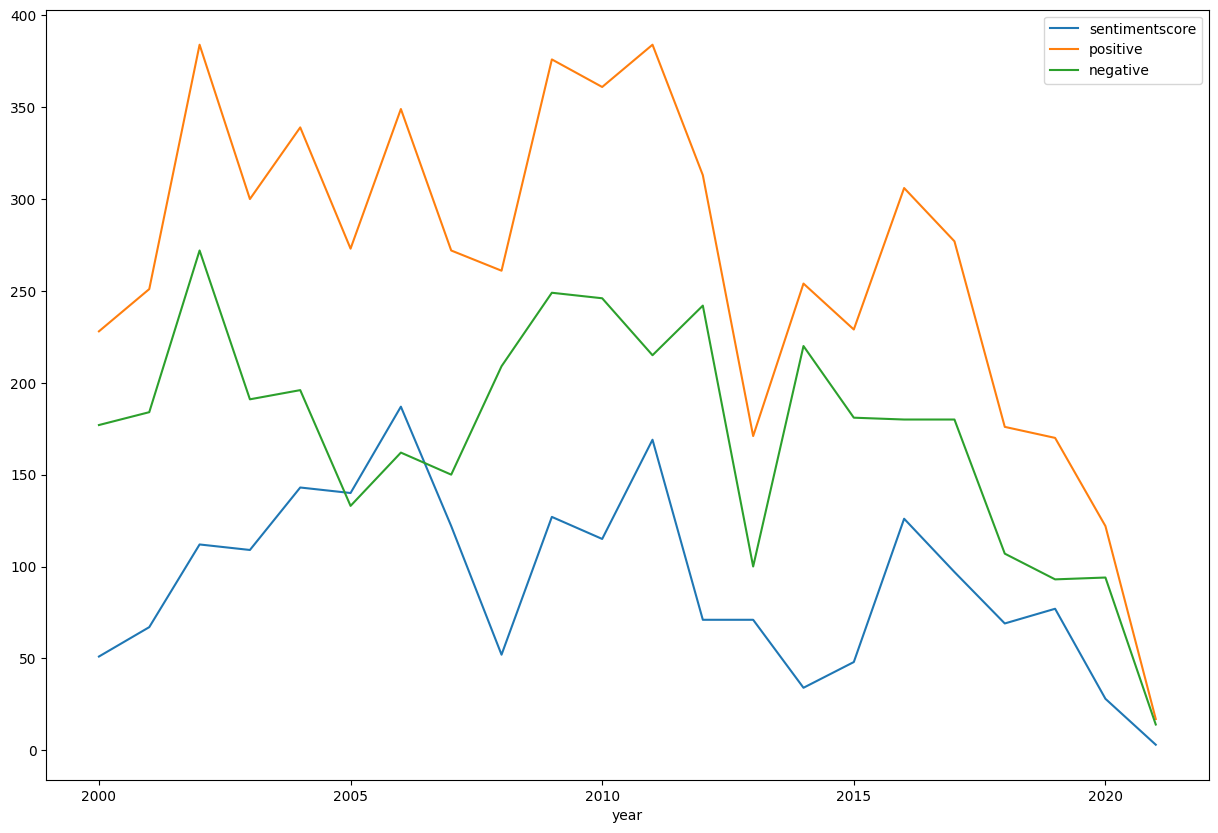

In [11]:
r = result[["year","positive", "negative", "sentimentscore"]]
rgroup = r.groupby("year")[["sentimentscore", "positive", "negative"]].sum() 
rgroup.plot()

##  Lagre data 

**Skriv utdata** til en CSV-fil på ditt lokale filsystem:

| Kolonne | Beskrivelse |
| --- | --- |
| dhlabid | DH-labens ID-nummer for det digitale tekstobjektet (OCR-scannet tekst) i databasene |
| urn | Unique Resource Name (digitalt bilde av tekstdokumentet, tilgjengelig i nettbiblioteket) |
| title |  Avistittel, navn på publikasjon |
| city  | Publiseringssted (oftest en by) |
| timestamp  | datostempel i ISO-format (YYYYMMDD) |
| year | årstall for publikasjonen |
| doctype | Dokumenttype (her er det bare aviser, "digavis") |
| word | nøkkelord i tekstutdragene (konkordansene) som sentimentanalysen ble utført på
| count | ordfrekvens: antall ganger nøkkelordet forekommer i den gitte avisutgivelsen |
| positive | antall positive ord i kontekstene nøkkelordet forekommer i |
| negative | antall negative ord i kontekstene |
| sentimentscore  | differansen positiv score - negativ score |
| url | lenke til avisen i nettbiblioteket, inkl. søk på nøkkelordet |


In [12]:
outputfile = f"sentimentanalyse_aviskorpus_{from_year}-{to_year}_{dt.date.today()}.csv"
result.to_csv(outputfile)